In [3]:
import pandas as pd
import matplotlib


In [4]:
# Reading csv files 

#Bank Account Information
df_acc = pd.read_csv('../계좌정보.csv')

#Customer Information
df_cus = pd.read_csv('../고객정보.csv')

#Domestic Stock Trade Information
df_trn = pd.read_csv('../국내주식매매정보.csv')                     
                    
#Name of Stocks
df_tic = pd.read_csv('../종목정보.csv')

In [65]:
df_acc.head()

,act_id,cus_id,act_opn_ym
0,a9c528fb499a54ac617b06e5ed16a1609b69f4561fe51f...,a8fd98e9088474d7c4afa9c8d5d577d779719e5e674945...,198404
1,be28d1507558a7c763064ce0f9fe64b15830f541d78d44...,82fa07fe4d96acc0ade70a96ed332db72d580ef30a6c0d...,199305
2,39661c8738cdd7773b3a85c33f9cd952386b68e7091267...,3a57bdc08731d76dae6081dd13546e9a48b755c58e461d...,199604
3,d689878708ccdba7e1682eb393fa6792fd4d7ed8c78110...,e1fcda01f09346bf4fab40343d8bc2f70996d6a12a4987...,199901
4,505fa5ce63545724628b4f03cb3eb871ec3247bb7c66e2...,1e24d94b5e05142507318c40a3ea7854c3355328e3a891...,199009


In [20]:
df_cus_z = df_cus.loc[df_cus.cus_age < 30] #gen-Z 
df_acc_z = df_acc[df_acc['cus_id'].isin(df_cus_z['cus_id'])] #gen-Z accounts
df_trn_z = df_trn[df_trn['act_id'].isin(df_acc_z['act_id'])] #gen-Z transactions
df_trn_nz = df_trn[~df_trn['act_id'].isin(df_acc_z['act_id'])] #non gen-Z transactions

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd
21,c6f6c4b8dc20e8bae473b489afd66ed8935851abcfb5ef...,20200103,1,12,13,A069410,2,139,8640.0,3
234,eaedbd4fd0ea9ac15c6c3ad4172298fc547357e7dafd07...,20200116,1,12,12,A200710,2,5,28750.0,3
240,ef06c8b05127574b0d19e8a0387f2933084d59a71a2896...,20200117,1,9,14,A161890,2,10,52700.0,3
241,ef06c8b05127574b0d19e8a0387f2933084d59a71a2896...,20200117,2,11,12,A161890,2,10,52900.0,3
471,e55b8615dbbc962c281dcd4f95c9d6edd4b6abfb45fb79...,20200211,1,9,9,A043200,1,28,2885.0,3


In [6]:
# Removing data without values
temp_cus = df_cus.copy()
temp_ivs = temp_cus[temp_cus['ivs_icn_cd'] == '-']

#투자성향 코드가 4194개, 약 41.94프로가 비어있음 
#MAR? 자신의 투자성향 코드를 몰라서 대답 안했을 가능성

df_cus['cus_age'].unique()

array([70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20,  0])

In [7]:
temp_cus_z = df_cus_z.copy()
temp_ivs_z = temp_cus_z[temp_cus_z['ivs_icn_cd'] == '-']
# Proportion of Gen Z not answering ivs
gen_z_ivs = (temp_ivs_z.shape[0])/(temp_cus_z.shape[0])
gen_z_ivs

# Proportion of Non Gen Z not answering ivs
non_gen_z_ivs_blank = temp_ivs.shape[0] - temp_ivs_z.shape[0]
non_gen_z_ivs_total = temp_cus.shape[0] - temp_cus_z.shape[0]
non_gen_z_ivs = non_gen_z_ivs_blank/non_gen_z_ivs_total

# As a result, no significant difference

In [8]:
# Thirties Data
df_cus_i = df_cus[df_cus['cus_age'] < 40]
df_cus_thirties = df_cus_i[df_cus_i['cus_age'] >=30]
df_acc_thirties = df_acc[df_acc['cus_id'].isin(df_cus_thirties['cus_id'])] #Thirties accounts
df_trn_thirties = df_trn[df_trn['act_id'].isin(df_acc_thirties['act_id'])] #Thirties transactions

# Fourties Data
df_cus_f = df_cus[df_cus['cus_age'] < 50]
df_cus_fourties = df_cus_f[df_cus_f['cus_age'] >= 40]
df_acc_fourties = df_acc[df_acc['cus_id'].isin(df_cus_fourties['cus_id'])] #Fourties accounts
df_trn_fourties = df_trn[df_trn['act_id'].isin(df_acc_fourties['act_id'])] #Fourties transactions

# Fifties Data
df_cus_ff = df_cus[df_cus['cus_age'] < 60]
df_cus_fifties = df_cus_ff[df_cus_ff['cus_age'] >= 50]
df_acc_fifties = df_acc[df_acc['cus_id'].isin(df_cus_fifties['cus_id'])] #Fifties accounts
df_trn_fifties = df_trn[df_trn['act_id'].isin(df_acc_fifties['act_id'])] #Fifties transactions

# Sixties + Data
df_cus_sixties = df_cus[df_cus['cus_age'] > 60]
df_acc_sixties = df_acc[df_acc['cus_id'].isin(df_cus_sixties['cus_id'])] #Sixties accounts
df_trn_sixties = df_trn[df_trn['act_id'].isin(df_acc_sixties['act_id'])] #Sixties transactions


# Function to find the number of transactions
def len_trn(df):
    return len(df['iem_cd'].unique())

df_trn_fifties.shape[0]

30721

In [9]:
# Function to find the top trade sum
def sum_val(df, top):
    df['orr_amt'] = df['cns_qty']* df['orr_pr']
    transz = df.groupby('iem_cd')['orr_amt'].sum().sort_values(ascending=False)
    sumz = 0
    for i in range(top):
        sumz += transz[i]
    return sumz

In [47]:
#Tested Values
df_cus_fff = df_cus[df_cus['cus_age'] < 55]
df_cus_fiftie = df_cus_fff[df_cus_fff['cus_age'] >= 40]
df_acc_fiftie = df_acc[df_acc['cus_id'].isin(df_cus_fiftie['cus_id'])]
df_trn_fiftie = df_trn[df_trn['act_id'].isin(df_acc_fiftie['act_id'])] 

sum_val(df_trn_fiftie, 10)
sum_m = sum_val(df_trn_fiftie,10)
gen_Z = sum_m / (df_trn_fiftie['orr_amt'].sum())


# Proportion for each generation for top 10 topics
gen_z = 0.28462 # 0 ~ 24
gen_m = 0.14502 # 25 ~ 39
gen_x = 0.18337 # 40 ~ 54
gen_b = 0.14715 # 55 +


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
df_trn_fiftie.head()

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd
0,60b17ae6e76c87878a3f9897f2cd4b30baca8c07dd0844...,20200102,1,11,15,A012330,2,1,248000.0,3
1,60b17ae6e76c87878a3f9897f2cd4b30baca8c07dd0844...,20200102,2,11,11,A196170,2,10,67900.0,3
2,60b17ae6e76c87878a3f9897f2cd4b30baca8c07dd0844...,20200102,3,14,15,A005930,2,1,55300.0,3
87,bdc2dc570fc9c6fc13eae3baad6f34df5b44a448922505...,20200108,1,10,10,A005930,1,100,56500.0,3
89,7f7ebc231aaf498f116125f46b6d21dbc531a32513e40e...,20200108,1,12,14,A078130,2,800,5400.0,3


In [66]:
# Checking all gen
df_cus_fff = df_cus[df_cus['cus_age'] < 100]
df_cus_fiftie = df_cus_fff[df_cus_fff['cus_age'] >= 0]
df_acc_fiftie = df_acc[df_acc['cus_id'].isin(df_cus_fiftie['cus_id'])]
df_trn_fiftie = df_trn[df_trn['act_id'].isin(df_acc_fiftie['act_id'])] 

df_trn_fiftie['orr_amt'] = df_trn_fiftie['cns_qty'] * df_trn_fiftie['orr_pr']
transz = df_trn_fiftie.groupby('iem_cd')['orr_amt'].sum().sort_values(ascending=False)

In [62]:
df_50 = pd.merge(transz,df_tic, how = "left", on = 'iem_cd')
merge_50 = df_50.groupby('iem_cd')[['orr_amt','iem_krl_nm']].sum().sort_values(by = 'orr_amt', ascending=False)
pd.merge(merge_50,df_tic, how = "left", on = 'iem_cd')[:11]

,iem_cd,orr_amt,iem_eng_nm,iem_krl_nm
0,A005930,4.574576e+09,SamsungElectronics ...,삼성전자보통주 ...
1,A122630,4.189371e+09,SAMSUNG KODEX LEVERAGE ETF[EQUITY-DERIVATIVES]...,삼성KODEX레버리지증권상장지수투자신탁[주식-파생형] ...
2,A035720,2.903538e+09,Kakao ...,카카오보통주 ...
3,A252670,2.367144e+09,SAMSUNG KODEX 200 Futures Inverse 2X ETF ...,삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) ...
4,A091990,2.135747e+09,"Celltrion Healthcare Co., Ltd. ...",셀트리온헬스케어 ...
5,A068270,1.795896e+09,Celltrion ...,셀트리온보통주 ...
6,A095700,1.695304e+09,"Genexine, Inc. ...",제넥신 ...
7,A005380,1.629704e+09,HyundaiMotor ...,현대자동차보통주 ...
8,A051910,1.613631e+09,"LGCHEM,LTD ...",LG화학보통주 ...
9,A000660,1.594897e+09,SK hynix ...,에스케이하이닉스보통주 ...


In [12]:
# Finding the top 30 trade for gen z and non gen z
top = 30
df_trn_z = df_trn_z.copy()
df_trn_z['orr_amt'] = df_trn_z['cns_qty']*df_trn_z['orr_pr']
trans_z = df_trn_z.groupby('iem_cd')['orr_amt'].sum().sort_values(ascending=False)
sum = 0
for i in range(top):
    sum += trans_z[i]

# Gen z proportion of top 30 trade
gen_z_val = sum / df_trn_z['orr_amt'].sum()

df_trn_nz = df_trn_nz.copy()
df_trn_nz['orr_amt'] = df_trn_nz['cns_qty']*df_trn_nz['orr_pr']
trans_nz = df_trn_nz.groupby('iem_cd')['orr_amt'].sum().sort_values(ascending=False)
sum_nz = 0
for i in range(top):
    sum_nz += trans_nz[i]

# Non Gen z proportion of top 30 trade
gen_nz_val = sum_nz / df_trn_nz['orr_amt'].sum()

In [13]:
# DataFrame for the top 10 trade proportions
lst = [gen_z, gen_m, gen_x, gen_b]
df_trend = pd.DataFrame(data = lst, columns = ['Trend'])
df_trend

,Trend
0,0.28462
1,0.14502
2,0.18337
3,0.14715


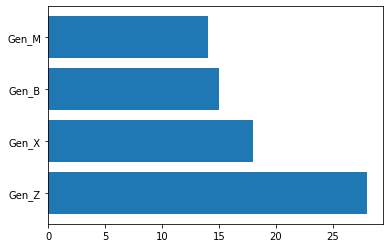

In [14]:
#Making bar graph for the dataframe above
import matplotlib.pyplot as plt

df = pd.DataFrame({'A':['Gen_Z'] * 28 + ['Gen_M'] * 14 + ['Gen_X'] * 18 + ['Gen_B'] * 15})
counts = df["A"].value_counts()
plt.barh(counts.index, counts)
plt.show()

